In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1oo-_kIyztbi1joPtGMqBrF6d8tKQD85R/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1oo-_kIyztbi1joPtGMqBrF6d8tKQD85R
To: /content/Mergedcrops - Sheet1.csv
100% 2.10M/2.10M [00:00<00:00, 20.2MB/s]


In [ ]:
import pandas as pd

file_path = '/content/Mergedcrops - Sheet1.csv'
df = pd.read_csv(file_path)
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price,Unnamed: 10
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100,4500,4350,NaN
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200,3000,2450,NaN
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350,3000,2700,NaN
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000,7500,7250,NaN
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400,9000,8850,NaN


In [ ]:
df.head()
df.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min Price', 'Max Price', 'Modal Price', 'Unnamed: 10'],
      dtype='object')

In [ ]:
# Drop the unnamed column
df.head()
df = df.drop(columns=['Unnamed: 10'])

# Check for missing values
df.isnull().sum()


,0
State,15
District,3051
Market,15
Commodity,15
Variety,3051
Grade,3051
Arrival_Date,1
Min Price,15
Max Price,15
Modal Price,1


In [ ]:
df = df.dropna(subset=['Modal Price'])


In [ ]:
cat_cols = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Optional: drop Arrival_Date if needed later
df = df.dropna(subset=['Arrival_Date'])  # just in case of date parsing errors


In [ ]:
# Convert to datetime
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], errors='coerce')
df['Month'] = df['Arrival_Date'].dt.month
df['Year'] = df['Arrival_Date'].dt.year

# Label encode
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


<ipython-input-12-9765151800e8>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], errors='coerce')


In [ ]:
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], dayfirst=True, errors='coerce')


In [ ]:
df['Month'] = df['Arrival_Date'].dt.month
df['Year'] = df['Arrival_Date'].dt.year


In [ ]:
from sklearn.model_selection import train_test_split

# Drop columns that shouldn't be features
X = df.drop(columns=['Modal Price', 'Arrival_Date'])  # keep Month & Year
y = df['Modal Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)


ValueError: could not convert string to float: 'Min Price'

In [ ]:
df.head(10)


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price,Month,Year
0,6,12,395,22,57,0,2023-07-27,4100,4500,4350,7.0,2023.0
1,6,12,395,28,311,0,2023-07-27,2200,3000,2450,7.0,2023.0
2,6,12,395,32,81,0,2023-07-27,2350,3000,2700,7.0,2023.0
3,6,12,395,40,87,0,2023-07-27,7000,7500,7250,7.0,2023.0
4,6,12,395,61,112,0,2023-07-27,8400,9000,8850,7.0,2023.0
5,6,12,395,87,182,0,2023-07-27,11000,14000,12500,7.0,2023.0
6,6,12,395,93,180,0,2023-07-27,7200,8000,7550,7.0,2023.0
7,6,12,395,102,194,0,2023-07-27,6800,7500,7350,7.0,2023.0
8,6,12,395,126,252,0,2023-07-27,1850,2550,2200,7.0,2023.0
9,6,12,395,221,256,0,2023-07-27,9800,10000,9950,7.0,2023.0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Modal Price', 'Arrival_Date'])  # Arrival_Date is not numeric
y = df['Modal Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


ValueError: could not convert string to float: 'Min Price'

In [ ]:
df[df.apply(lambda row: row.astype(str).str.contains('Min Price').any(), axis=1)]


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price,Month,Year
23094,22,104,1034,59,434,1,NaT,Min Price,Max Price,Modal Price,NaN,NaN


In [ ]:
df = df[~df.apply(lambda row: row.astype(str).str.contains('Min Price').any(), axis=1)]


In [ ]:
# Convert price columns to numeric
price_cols = ['Min Price', 'Max Price', 'Modal Price']
df[price_cols] = df[price_cols].apply(pd.to_numeric, errors='coerce')


In [ ]:
X = df.drop(columns=['Modal Price', 'Arrival_Date'])
y = df['Modal Price']

# Make sure everything is numeric
print(X.dtypes)


State          int64
District       int64
Market         int64
Commodity      int64
Variety        int64
Grade          int64
Min Price    float64
Max Price    float64
Month        float64
Year         float64
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Modal Price', 'Arrival_Date'])
y = df['Modal Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Absolute Error: 107.27655351620182
R² Score: 0.950896188926775


In [ ]:
import joblib
joblib.dump(model, 'price_predictor_model.pkl')


['price_predictor_model.pkl']

In [ ]:
def predict_price(model, input_data):
    return model.predict([input_data])[0]


In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost MAE:", mae_xgb)
print("XGBoost R² Score:", r2_xgb)


XGBoost MAE: 161.77390019579494
XGBoost R² Score: 0.931651704796713


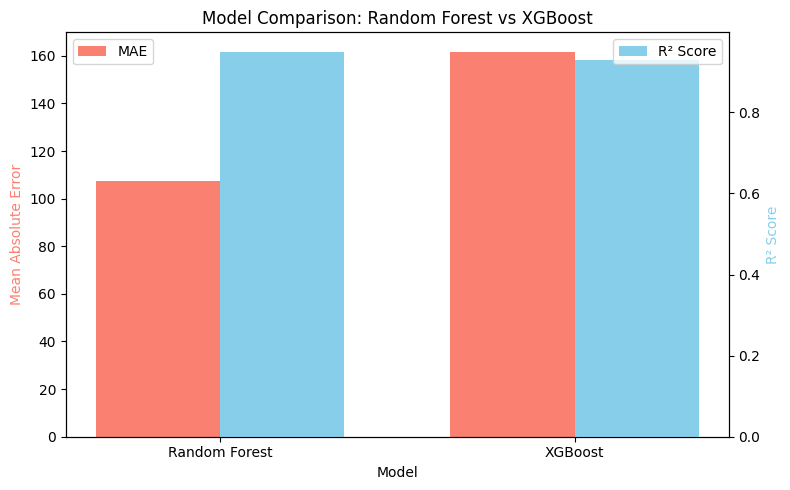

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
models = ['Random Forest', 'XGBoost']
mae_values = [107.27, 161.77]
r2_values = [0.95, 0.93]

x = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

fig, ax1 = plt.subplots(figsize=(8,5))

# Plotting MAE
bar1 = ax1.bar(x - width/2, mae_values, width, label='MAE', color='salmon')
# Plotting R² (on secondary y-axis)
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, r2_values, width, label='R² Score', color='skyblue')

# Labels and Titles
ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Absolute Error', color='salmon')
ax2.set_ylabel('R² Score', color='skyblue')
ax1.set_title('Model Comparison: Random Forest vs XGBoost')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
from google.colab import files
files.download('price_predictor_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('le_commodity.pkl')

FileNotFoundError: Cannot find file: le_commodity.pkl

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_commodity = LabelEncoder()
df['Commodity'] = le_commodity.fit_transform(df['Commodity'])

le_district = LabelEncoder()
df['District'] = le_district.fit_transform(df['District'])


In [ ]:
import joblib

joblib.dump(le_commodity, 'le_commodity.pkl')
joblib.dump(le_district, 'le_district.pkl')


['le_district.pkl']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_commodity = LabelEncoder()
df['Commodity'] = le_commodity.fit_transform(df['Commodity'])


In [ ]:
import joblib
joblib.dump(le_commodity, 'le_commodity.pkl')


['le_commodity.pkl']

In [ ]:
import pandas as pd

# Commodity Mapping
commodity_mapping = pd.DataFrame({
    'Commodity_Name': le_commodity.classes_,
    'Code': le_commodity.transform(le_commodity.classes_)
})
commodity_mapping.to_csv('commodity_code_mapping.csv', index=False)
files.download('commodity_code_mapping.csv')

# District Mapping
district_mapping = pd.DataFrame({
    'District_Name': le_district.classes_,
    'Code': le_district.transform(le_district.classes_)
})
district_mapping.to_csv('district_code_mapping.csv', index=False)
files.download('district_code_mapping.csv')


NameError: name 'le_commodity' is not defined

In [ ]:
import joblib

# Save the encoders again
joblib.dump(le_commodity, 'le_commodity.pkl')
joblib.dump(le_district, 'le_district.pkl')


NameError: name 'le_commodity' is not defined

In [ ]:
import os

# List files in current Colab directory
os.listdir()


['.config', 'drive', 'sample_data']

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Mergedcrops - Sheet1.csv to Mergedcrops - Sheet1.csv


In [ ]:
import os
os.listdir()


['.config', 'drive', 'Mergedcrops - Sheet1.csv', 'sample_data']

In [ ]:
import pandas as pd

df = pd.read_csv('Mergedcrops - Sheet1.csv')  # or the exact name from os.listdir()
df.head()


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price,Unnamed: 10
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100,4500,4350,NaN
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200,3000,2450,NaN
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350,3000,2700,NaN
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000,7500,7250,NaN
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400,9000,8850,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Create label encoders
le_commodity = LabelEncoder()
le_district = LabelEncoder()

# Fit and transform the relevant columns
df['Commodity'] = le_commodity.fit_transform(df['Commodity'])
df['District'] = le_district.fit_transform(df['District'])

# Save the encoders to .pkl files
joblib.dump(le_commodity, 'le_commodity.pkl')
joblib.dump(le_district, 'le_district.pkl')


['le_district.pkl']

In [ ]:
df.columns


Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min Price', 'Max Price', 'Modal Price', 'Unnamed: 10'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Clean column names just in case
df.columns = df.columns.str.strip()

# Create label encoders
le_commodity = LabelEncoder()
le_district = LabelEncoder()

# Fit and transform the columns
df['Commodity'] = le_commodity.fit_transform(df['Commodity'])
df['District'] = le_district.fit_transform(df['District'])

# Save the encoders
joblib.dump(le_commodity, 'le_commodity.pkl')
joblib.dump(le_district, 'le_district.pkl')


['le_district.pkl']

In [ ]:
import joblib
joblib.dump(le_commodity, 'le_commodity.pkl')


['le_commodity.pkl']

In [ ]:
from google.colab import files

files.download('le_commodity.pkl')



FileNotFoundError: Cannot find file: le_commodity.pkl

In [ ]:
from google.colab import files

files.download('le_district.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CropPriceAI/Mergedcrops - Sheet1.csv')



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CropPriceAI/Mergedcrops - Sheet1.csv')

# Convert 'Modal Price' to numeric, forcing errors to NaN
df['Modal Price'] = pd.to_numeric(df['Modal Price'], errors='coerce')

# Drop rows with NaNs in any required columns (including Modal Price)
required_columns = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Modal Price']
df = df.dropna(subset=required_columns)

# Make a copy
data = df.copy()

# Categorical columns
categorical_cols = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']

# Dictionary to hold label encoders
encoders = {}

# Encode all categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

# Features and target
X = data[categorical_cols]
y = data['Modal Price']

# Train the model
model = RandomForestRegressor()
model.fit(X, y)

# Save the model and encoders
joblib.dump(model, 'crop_price_model.pkl')
joblib.dump(encoders, 'label_encoders.pkl')

print("✅ Model trained and saved successfully!")

joblib.dump(encoders, 'label_encoders.pkl')

print("✅ Model trained and saved successfully!")



✅ Model trained and saved successfully!


In [ ]:
from google.colab import files
files.download('crop_price_model.pkl')
files.download('label_encoders.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the model on training set (to be fair)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"🔍 Evaluation Results:")
print(f"📉 MAE: {mae:.2f}")
print(f"📏 RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.2f}")


🔍 Evaluation Results:
📉 MAE: 679.49
📏 RMSE: 1806.73
📈 R² Score: 0.85


In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define model
rf = RandomForestRegressor(random_state=42)

# Param grid (updated and valid)
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_distributions,
                                   n_iter=10,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1,
                                   random_state=42)

# Fit
random_search.fit(X, y)

# Best model
best_rf = random_search.best_estimator_

# Save it if needed
import joblib
joblib.dump(best_rf, "tuned_crop_price_model.pkl")

print("✅ Best model saved as 'tuned_crop_price_model.pkl'")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best model saved as 'tuned_crop_price_model.pkl'


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict using tuned model
y_pred = best_rf.predict(X)

# Evaluation metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print("📉 MAE:", round(mae, 2))
print("📏 RMSE:", round(rmse, 2))
print("📈 R² Score:", round(r2, 4))


📉 MAE: 347.93
📏 RMSE: 1083.45
📈 R² Score: 0.9656


In [ ]:
from google.colab import files
files.download('tuned_crop_price_model.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('label_encoders.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Save label mappings
for col, le in encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    pd.DataFrame(mapping.items(), columns=[col, 'Encoded']).to_csv(f'{col}_mapping.csv', index=False)
    files.download(f'{col}_mapping.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
import joblib
import numpy as np

# Load model and encoders
model = joblib.load('/content/tuned_crop_price_model.pkl')  # path where your model is saved
encoders = joblib.load('/content/label_encoders (1).pkl')       # path where encoders are saved

# ✅ Your test input (replace with your actual inputs)
test_input = {
    'State': 'Meghalaya',
    'District': 'East Khasi Hills',
    'Market': 'Shillong',
    'Commodity': 'Potato',
    'Variety': 'Local',
    'Grade': 'FAQ'
}

# 🔄 Encode inputs
encoded_input = []
for feature in ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']:
    if test_input[feature] in encoders[feature].classes_:
        val = encoders[feature].transform([test_input[feature]])[0]
    else:
        raise ValueError(f"❌ '{test_input[feature]}' is not a valid {feature}.")
    encoded_input.append(val)

# 📈 Predict
input_array = np.array(encoded_input).reshape(1, -1)
predicted_price = model.predict(input_array)[0]

print(f"✅ Predicted Modal Price: ₹{predicted_price:.2f}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/tuned_crop_price_model.pkl'

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import os

folder_path = '/content/drive/MyDrive/CropPriceAI'  # or your subfolder like '/content/drive/MyDrive/CropPriceAI'

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.pkl') or file.endswith('.joblib'):  # Only show model-related files
            print(os.path.join(root, file))


/content/drive/MyDrive/CropPriceAI/tuned_crop_price_model.pkl
/content/drive/MyDrive/CropPriceAI/label_encoders (1).pkl


In [54]:
import joblib

# Change these paths to your actual saved files
model = joblib.load('/content/drive/MyDrive/CropPriceAI/tuned_crop_price_model.pkl')
encoders = joblib.load('/content/drive/MyDrive/CropPriceAI/label_encoders (1).pkl')


In [55]:
import joblib
import numpy as np
import pandas as pd


# Load label encoders from the correct file
label_encoders = joblib.load(open('/content/drive/MyDrive/CropPriceAI/label_encoders (1).pkl', 'rb'))

# ✅ Your test input (replace with your actual inputs)
test_input = {
    'State': 'Maharashtra',
    'District': 'Pune',
    'Market': 'Pune',
    'Commodity': 'Coriander(Leaves)',
    'Variety': 'Other',
    'Grade': 'FAQ'  # Ensure you handle this appropriately based on your encoding
}

# Gracefully handle missing values for Grade
grade = test_input.get('Grade', 'FAQ')  # Fallback to 'FAQ' if no grade is provided
if grade not in label_encoders['Grade'].classes_:
    print(f"⚠️ Warning: '{grade}' not found in encoder for 'Grade'. Using default value 'FAQ'.")
    grade_encoded = label_encoders['Grade'].transform(['FAQ'])[0]
else:
    grade_encoded = label_encoders['Grade'].transform([grade])[0]

# 🔄 Encode inputs with graceful fallback
encoded_input = []
feature_order = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']

for feature in feature_order:
    value = test_input[feature]
    encoder = label_encoders.get(feature)

    if encoder:
        if value in encoder.classes_:
            val = encoder.transform([value])[0]
        else:
            print(f"⚠️ Warning: '{value}' not found in encoder for '{feature}'. Using default value 0.")
            val = 0  # Default fallback if the input value was not seen during training
    else:
        # If encoder is missing for a feature
        print(f"⚠️ Warning: No encoder found for '{feature}'. Using default value 0.")
        val = 0

    encoded_input.append(val)

# 📦 Convert to DataFrame with feature names to remove warning
input_df = pd.DataFrame([encoded_input], columns=feature_order)

# 📈 Predict (Assuming your model is loaded and ready to predict)
# Make sure to load your model before this part
# Example: model = joblib.load('path_to_model.pkl')

predicted_price = model.predict(input_df)[0]

print(f"✅ Predicted Modal Price: ₹{predicted_price:.2f}")


✅ Predicted Modal Price: ₹297.85


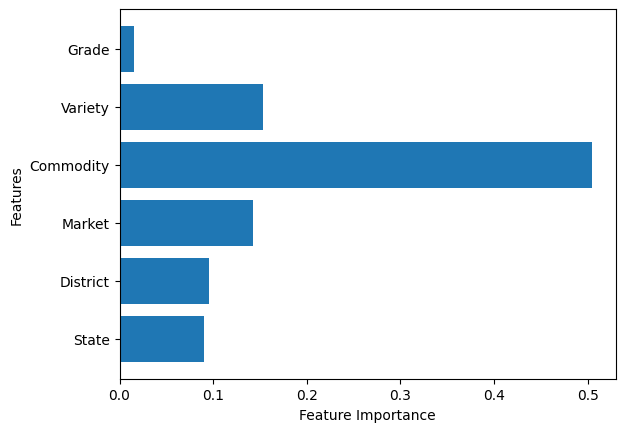

In [25]:
# If your model is RandomForest, you can inspect feature importance
import matplotlib.pyplot as plt

# Assuming `model` is your trained RandomForest model
importances = model.feature_importances_
features = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']

# Plot the feature importances
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


In [26]:
print("Classes for 'Commodity':", label_encoders['Commodity'].classes_)


Classes for 'Commodity': ['Ajwan' 'Alasande Gram' 'Almond(Badam)' 'Alsandikai' 'Amaranthus'
 'Amla(Nelli Kai)' 'Amphophalus' 'Anthorium' 'Apple'
 'Arecanut(Betelnut/Supari)' 'Arhar (Tur/Red Gram)(Whole)'
 'Arhar Dal(Tur Dal)' 'Ashgourd' 'Bajra(Pearl Millet/Cumbu)' 'Banana'
 'Banana - Green' 'Barley (Jau)' 'Beans' 'Beetroot'
 'Bengal Gram Dal (Chana Dal)' 'Bengal Gram(Gram)(Whole)' 'Betal Leaves'
 'Bhindi(Ladies Finger)' 'Bitter gourd' 'Black Gram (Urd Beans)(Whole)'
 'Black Gram Dal (Urd Dal)' 'Black pepper' 'Bottle gourd' 'Brinjal'
 'Broomstick(Flower Broom)' 'Bull' 'Bunch Beans' 'Cabbage' 'Calf'
 'Capsicum' 'Cardamoms' 'Carnation' 'Carrot' 'Cashewnuts' 'Castor Seed'
 'Cauliflower' 'Chapparad Avare' 'Cherry' 'Chikoos(Sapota)' 'Chili Red'
 'Chilly Capsicum' 'Chow Chow' 'Chrysanthemum' 'Chrysanthemum(Loose)'
 'Cinamon(Dalchini)' 'Cloves' 'Cluster beans' 'Cock' 'Cocoa' 'Coconut'
 'Coconut Oil' 'Coconut Seed' 'Coffee' 'Colacasia' 'Copra'
 'Coriander(Leaves)' 'Corriander seed' 'Cotton' 'Co

In [28]:
# Encode the input 'Commodity' to see the encoded value
encoded_commodity = label_encoders['Commodity'].transform(['Coriander(Leaves)'])[0]
print(f"Encoded value for 'Coriander(Leaves)': {encoded_commodity}")


Encoded value for 'Coriander(Leaves)': 60


In [36]:
print(df.columns.tolist())


['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Arrival_Date', 'Min Price', 'Max Price', 'Modal Price', 'Unnamed: 10']


In [41]:
# Check how many rows are remaining after dropping NaN values
print(f"Remaining rows after dropping NaNs: {df.shape[0]}")


Remaining rows after dropping NaNs: 1


In [44]:
# Check for NaN in Modal Price
print(df['Modal Price'].isna().sum())


1


In [45]:
df['Modal Price'] = df['Modal Price'].fillna(0)


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicting on training data and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R-Squared (Coefficient of Determination)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Print all metrics
print(f"✅ Training R-Squared: {train_r2:.4f}")
print(f"✅ Test R-Squared: {test_r2:.4f}")
print(f"✅ Training MAE: {train_mae:.4f}")
print(f"✅ Test MAE: {test_mae:.4f}")
print(f"✅ Training MSE: {train_mse:.4f}")
print(f"✅ Test MSE: {test_mse:.4f}")
print(f"✅ Training RMSE: {train_rmse:.4f}")
print(f"✅ Test RMSE: {test_rmse:.4f}")


✅ Training R-Squared: 0.9621
✅ Test R-Squared: 0.8522
✅ Training MAE: 315.2610
✅ Test MAE: 679.4873
✅ Training MSE: 1252500.2687
✅ Test MSE: 3264280.6913
✅ Training RMSE: 1119.1516
✅ Test RMSE: 1806.7320


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the model on training set (to be fair)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"🔍 Evaluation Results:")
print(f"📉 MAE: {mae:.2f}")
print(f"📏 RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.2f}")



🔍 Evaluation Results:
📉 MAE: 686.87
📏 RMSE: 1868.94
📈 R² Score: 0.84


In [61]:
# Retrain model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predicting on test set
y_test_pred = model.predict(X_test)

# Evaluate
test_r2 = r2_score(y_test, y_test_pred)
print(f"✅ Final Test R-Squared: {test_r2:.4f}")


✅ Final Test R-Squared: 0.8492


In [63]:
df = df.dropna()  # Or use fillna() with appropriate strategies


In [64]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']
encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


In [65]:
from sklearn.ensemble import RandomForestRegressor

# Use the same model configuration as before
model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [66]:
from sklearn.model_selection import train_test_split

# Consistent split with random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# R-Squared (Coefficient of Determination)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Print all metrics
print(f"✅ Training R-Squared: {train_r2:.4f}")
print(f"✅ Test R-Squared: {test_r2:.4f}")
print(f"✅ Training MAE: {train_mae:.4f}")
print(f"✅ Test MAE: {test_mae:.4f}")
print(f"✅ Training MSE: {train_mse:.4f}")
print(f"✅ Test MSE: {test_mse:.4f}")
print(f"✅ Training RMSE: {train_rmse:.4f}")
print(f"✅ Test RMSE: {test_rmse:.4f}")


✅ Training R-Squared: 0.9617
✅ Test R-Squared: 0.8453
✅ Training MAE: 318.0157
✅ Test MAE: 684.2514
✅ Training MSE: 1267838.8964
✅ Test MSE: 3416579.4436
✅ Training RMSE: 1125.9835
✅ Test RMSE: 1848.3992


In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on training data and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R-Squared (Coefficient of Determination)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Print all metrics
print(f"✅ Training R-Squared: {train_r2:.4f}")
print(f"✅ Test R-Squared: {test_r2:.4f}")
print(f"✅ Training MAE: {train_mae:.4f}")
print(f"✅ Test MAE: {test_mae:.4f}")
print(f"✅ Training MSE: {train_mse:.4f}")
print(f"✅ Test MSE: {test_mse:.4f}")
print(f"✅ Training RMSE: {train_rmse:.4f}")
print(f"✅ Test RMSE: {test_rmse:.4f}")


✅ Training R-Squared: 0.9617
✅ Test R-Squared: 0.8453
✅ Training MAE: 318.0157
✅ Test MAE: 684.2514
✅ Training MSE: 1267838.8964
✅ Test MSE: 3416579.4436
✅ Training RMSE: 1125.9835
✅ Test RMSE: 1848.3992


In [77]:
import joblib

# Change these paths to your actual saved files
model = joblib.load('/content/drive/MyDrive/CropPriceAI/tuned_crop_price_model.pkl')
encoders = joblib.load('/content/drive/MyDrive/CropPriceAI/label_encoders (1).pkl')

In [80]:
import joblib
import numpy as np
import pandas as pd

# ✅ Your test input (replace with your actual inputs)
test_input = {
    'State': 'Maharashtra',
    'District': 'Pune',
    'Market': 'Pune',
    'Commodity': 'Brinjal',
    'Variety': 'Other',
    'Grade': 'FAQ'
}

# 🔄 Encode inputs with graceful fallback
encoded_input = []
feature_order = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']

for feature in feature_order:
    value = test_input[feature]
    encoder = encoders[feature]
    if value in encoder.classes_:
        val = encoder.transform([value])[0]
    else:
        print(f"⚠ Warning: '{value}' not found in encoder for '{feature}'. Using default value 0.")
        val = 0  # Default fallback if the input value was not seen during training
    encoded_input.append(val)

# 📦 Convert to DataFrame with feature names to remove warning
input_df = pd.DataFrame([encoded_input], columns=feature_order)

# 📈 Predict
predicted_price = model.predict(input_df)[0]

print(f"✅ Predicted Modal Price: ₹{predicted_price:.2f}")

✅ Predicted Modal Price: ₹2809.41
